In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#normalinzing sum shit u pussy ass niger
def min_max_scaling(df):
    df_sklearn = df.copy()
# apply normalization techniques
    for col in df.columns :
        df_sklearn[col] = MinMaxScaler().fit_transform(np.array(df_sklearn[col]).reshape(-1,1))
    return  df_sklearn

In [3]:
def conection_between_rating_to_sales (df) :
    dff  = pd.DataFrame(df[['total sales/mil','rating']].copy())
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    pd.to_numeric(dff['total sales/mil'])
    dff = pd.DataFrame(min_max_scaling(dff))
    dff =pd.DataFrame( dff.sort_values('total sales/mil', ascending = True ))
    
    
    visualization_scatter(dff,'rating','total sales/mil','conection between  rating to sales','rating','total sales/mil')

In [4]:
def conection_between_user_rating_to_sales (df) :
    dff  = pd.DataFrame(df[['total sales/mil','user rating']].copy())
    dff['user rating'].replace("-",np.nan,inplace=True)
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff['user rating'] = pd.to_numeric(dff['user rating'])
    pd.to_numeric(dff['total sales/mil'])
    dff = pd.DataFrame(min_max_scaling(dff))
    dff =pd.DataFrame( dff.sort_values('total sales/mil', ascending = True ))
    
    
    visualization_scatter(dff,'user rating','total sales/mil','conection between user rating to sales','user rating','total sales/mil')

In [5]:
#visualization
def visualization_scatter (df,col1,col2,title,xlable,ylable) :

    plt.figure(figsize=(9.4,4))
    sns.scatterplot(x = col1, y = col2, data = df,  palette =  sns.cubehelix_palette(( 30), dark=0.3, light=.85, reverse=True)).set_title(title,fontsize = 18)

    plt.ylabel(ylable, fontsize=13)
    plt.xlabel(xlable, fontsize=13)
    plt.yticks(fontsize=1)

In [6]:
#visualization
def visualization (df,col1,col2,title,xlable,ylable,flag) :
    sns.set_style("dark")
    plt.figure(figsize=(14.4, 5))
    sns.barplot(x = col2, y = col1, data = df,  palette =  sns.cubehelix_palette(( 30), dark=0.3, light=.85, reverse=True)).set_title(title,fontsize = 18)

    plt.ylabel(xlable, fontsize=14)
    plt.xlabel(ylable, fontsize=14)
    plt.yticks(fontsize=14)
    
    
    if flag == 1 :
        plt.xlim(6, 10)
        
    if flag == 2 :
            plt.xlim(0, 10)

In [7]:
### biggest seller of games by devoloper

def most_selling_dev (df) :
    dff  = df[['total sales/mil','developer']].copy()
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    pd.to_numeric(dff['total sales/mil'])
    dff = dff.groupby(['developer'], as_index=False,)['total sales/mil'].sum()
    dff =pd.DataFrame( dff.sort_values('total sales/mil', ascending = False ))
  

    visualization (dff[:15],'developer','total sales/mil','biggest seller of games by devoloper',' ','coppies sold/mill',0)

In [8]:
### biggest seller of games by publisher
def most_selling_pub (df) :
    dff  = df[['total sales/mil','publisher']].copy()
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    pd.to_numeric(dff['total sales/mil'])
    dff = dff.groupby(['publisher'], as_index=False,)['total sales/mil'].sum()
    dff =pd.DataFrame( dff.sort_values('total sales/mil', ascending = False ))
   

    visualization (dff[:15],'publisher','total sales/mil','biggest seller of games by publisher',' ','coppies sold/mill',0)

In [9]:
#### biggest game devoloper
def biggest_dev_by_games (df) :
    dff  = df[['name','developer']].copy()
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff = dff.groupby(['developer'],as_index=False)['name'].count()
    dff =pd.DataFrame( dff.sort_values('name', ascending = False ))
   

    visualization (dff[:15],'developer','name','biggest game devoloper',' ','games developed',0)

In [10]:
#### most popular game genre
def most_popular_game_genre (df):
    dff  = df[['name','genre']].copy()
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff = dff.groupby(['genre'],as_index=False)['name'].count()
    dff =pd.DataFrame( dff.sort_values('name', ascending = False ))
    
    
    visualization (dff[:15],'genre','name','most popular genres',' ','games',0)

In [11]:
#### best user score by developer
def best_user_score_by_dev (df) :
    dff  = df[['user rating','developer']].copy()
    dff['user rating'].replace("-",np.nan,inplace=True)
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff2 =pd.DataFrame( (dff.groupby(['developer'],as_index=False)['user rating'].count()))
    dff2 =pd.DataFrame( dff2.sort_values('user rating', ascending = False ))
    dff2.drop(dff2.loc[dff2['user rating']>3].index, inplace=True)
    dev_to_drop = dff2['developer'].tolist()
    
    
    dff =pd.DataFrame( (dff.groupby(['developer'],as_index=False)['user rating'].mean()))
    dff = dff[~dff['developer'].str.contains('|'.join(dev_to_drop))]
    dff =pd.DataFrame( dff.sort_values('user rating', ascending = False ))
    
    
    visualization (dff[:15],'developer','user rating','best user score by developer',' ','avrege score',1)

In [12]:
#### best score by developer
def best_score_by_dev (df) :
    dff  = df[['rating','developer']].copy()
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff2 =pd.DataFrame( (dff.groupby(['developer'],as_index=False)['rating'].count()))
    dff2 =pd.DataFrame( dff2.sort_values('rating', ascending = False ))
    dff2.drop(dff2.loc[dff2['rating']>3].index, inplace=True)
    dev_to_drop = dff2['developer'].tolist()
    
    
    dff =pd.DataFrame( (dff.groupby(['developer'],as_index=False)['rating'].mean()))
    dff = dff[~dff['developer'].str.contains('|'.join(dev_to_drop))]
    dff =pd.DataFrame( dff.sort_values('rating', ascending = False ))
    
  
    visualization (dff[:15],'developer','rating','best score by developer',' ','avrege score',1)

In [13]:
#### best score by platform
def best_score_by_platform (df) :
    dff  = df[['rating','platforms']].copy()
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff =pd.DataFrame( (dff.groupby(['platforms'],as_index=False)['rating'].mean()))
    dff =pd.DataFrame( dff.sort_values('rating', ascending = False ))
  

    visualization (dff[:15],'platforms','rating','best score by platform',' ','avrege score',2)

In [14]:
#### best user score by platform
def best_user_score_by_platform (df) :
    dff  = df[['user rating','platforms']].copy()
    dff['user rating'].replace("-",np.nan,inplace=True)
    dff.dropna(inplace=True)
    dff.drop_duplicates(inplace=True)
    
    
    dff['user rating'] = pd.to_numeric(dff['user rating'])
    dff['user rating'] = dff['user rating']
    dff =pd.DataFrame( (dff.groupby(['platforms'],as_index=False)['user rating'].mean()))
    dff =pd.DataFrame( dff.sort_values('user rating', ascending = False ))
 

    visualization (dff[:15],'platforms','user rating','best user score by platform',' ','avrege score',2)

,name,hit,Year,price,total sales/mil,genre,developer,rating,user rating,age,platforms,number of players,publisher
0,Grand Theft Auto IV,1,2008.0,24.380000,10.57,Action Adventure,Rockstar Games,9.8,7.8,M,PS3,1,Rockstar Games
1,Grand Theft Auto IV,1,2008.0,24.380000,11.09,Action Adventure,Rockstar Games,9.8,7.9,M,X360,1,Rockstar Games
2,Super Mario Galaxy,1,2007.0,69.990000,12.80,Action,Nintendo,9.7,9.1,E,Wii,1,Nintendo
3,Super Mario Galaxy 2,1,2010.0,30.360000,7.41,Action,Nintendo EAD Tokyo,9.7,9.1,E,Wii,1,Nintendo
4,Red Dead Redemption 2,1,2018.0,17.950000,5.77,Action Adventure,Rockstar Games,9.7,8.0,M,XOne,32,Rockstar Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,Fighter Within,0,2013.0,11.680000,0.19,Sports,Ubisoft,2.3,2.8,T,XOne,1,Ubisoft
7668,Homie Rollerz,0,2008.0,31.958605,0.07,Driving,Webfoot Technologies,2.3,3.0,E,DS,8 Online,Destineer
7669,Fast & Furious: Showdown,0,2013.0,18.890000,0.05,Driving,Activision,2.2,1.3,T,X360,1,Activision
7670,Deal or No Deal,1,2007.0,14.980000,1.71,Miscellaneous,Artefacts Studio,2.0,2.2,E,DS,2,Destination Software


C:\Users\tomer\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\tomer\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


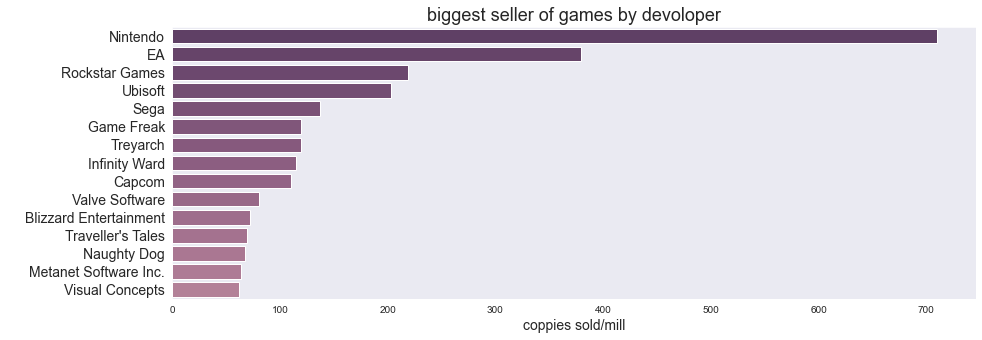

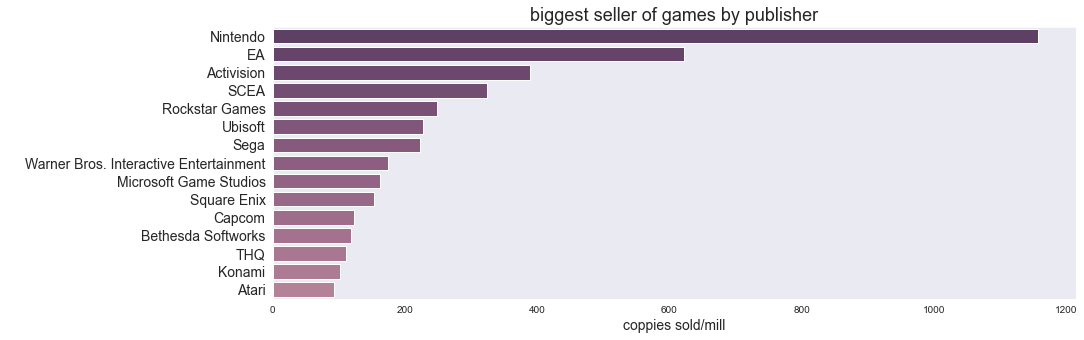

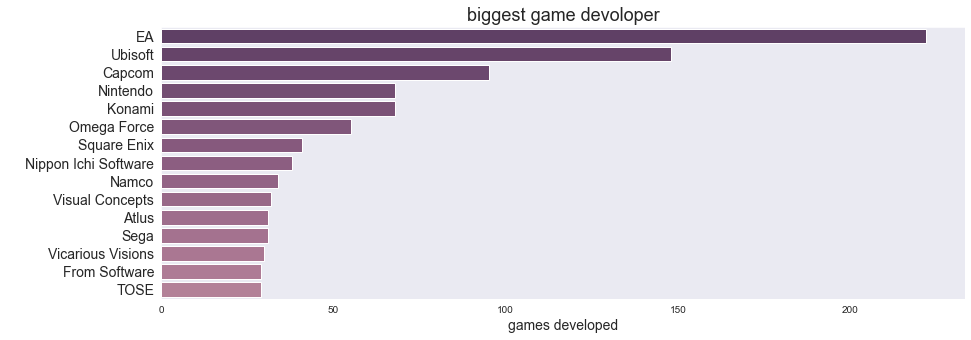

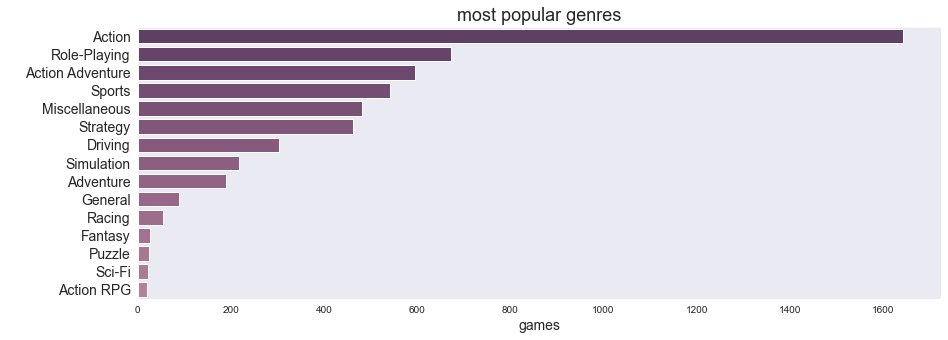

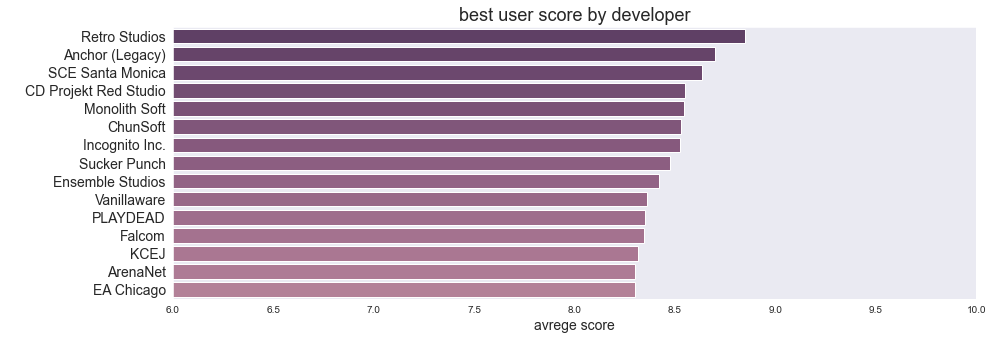

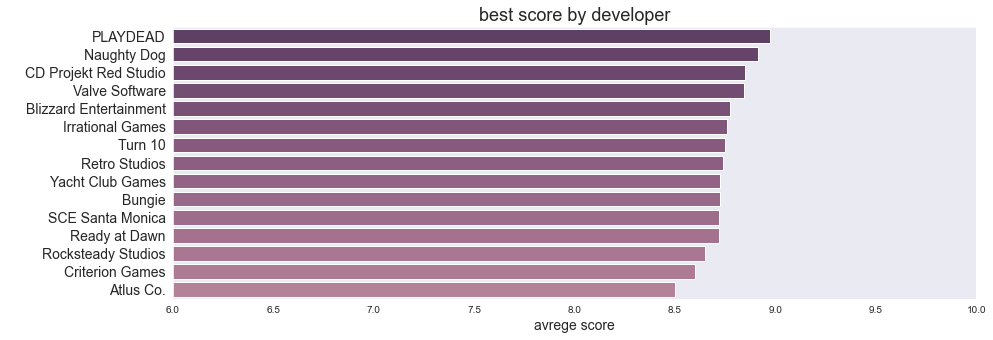

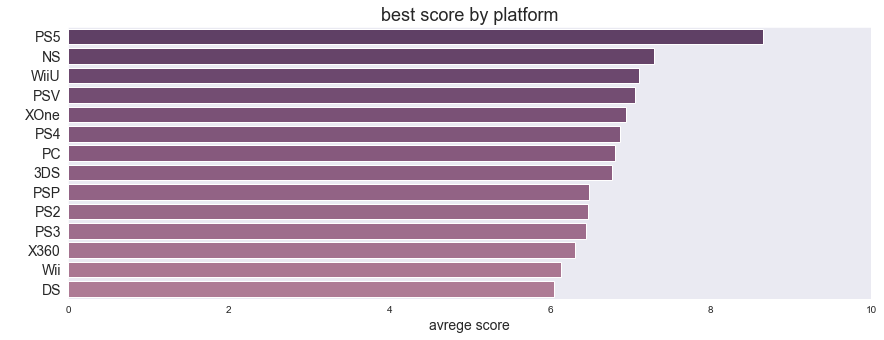

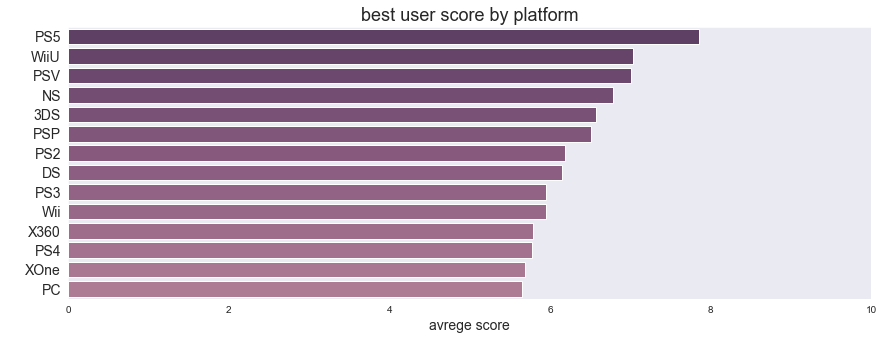

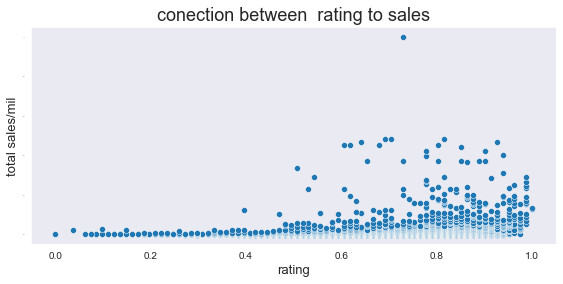

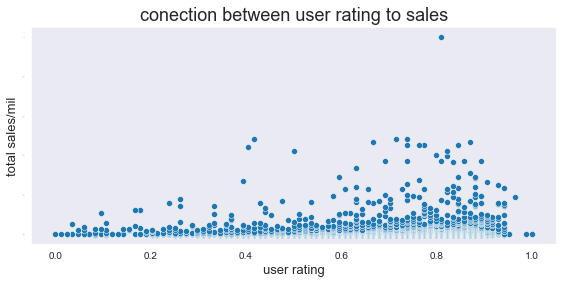

In [15]:
df = pd.read_csv('DataFrame#2.csv', index_col=0)
display (df)
most_selling_dev(df)
most_selling_pub (df)
biggest_dev_by_games (df)
most_popular_game_genre(df)
best_user_score_by_dev(df)
best_score_by_dev (df)
best_score_by_platform (df)
best_user_score_by_platform (df)
conection_between_rating_to_sales (df)
conection_between_user_rating_to_sales (df)